# LIBRARY

In [51]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

There are two common methods of parameter tuning: grid search and random search. 

Grid search is slow but effective at searching the whole search space, while random search is fast, but could miss important points in the search space.

a third option exists: Bayesian optimization. In this post, we will focus on one implementation of Bayesian optimization, a Python module called hyperopt

Bayesian optimization allow the data scientist to find the best parameters for all models, and therefore compare the best models. This results in better model selection, because you are comparing the best k nearest neighbors to the best decision tree. Only in this way can you do model selection with high confidence, assured that the actual best model is selected and used.

# Objective Functions

In [2]:
best = fmin(
    fn=lambda x: (x-1)**2,
    space=hp.uniform('x', 0, 1),
    algo=tpe.suggest,
    max_evals=100)

print (best)

100%|███████████████████████████████████████████████| 100/100 [00:00<00:00, 426.61it/s, best loss: 1.2001133925705e-07]
{'x': 0.9996535734720651}


anonymous function lambda x: x

hp.uniform is a built-in hyperoptfunction that takes three parameters: the name, x, and the lower and upper bound of the range, 0and 1.

The parameter algo takes a search algorithm, in this case tpe which stands for tree of Parzen estimators. The algo parameter can also be set to hyperopt.random.

we specify the maximum number of evaluations max_evals the fmin function will perform

Instead of minimizing an objective function, maybe we want to maximize it. To to this we need only return the negative of the function. For example, we could have a function y(x) = -(x**2)

# Search Spaces

The following will be used in this post:

   1. hp.choice(label, options) where options should be a python list or tuple.
   2. hp.normal(label, mu, sigma) where mu and sigma are the mean and standard deviation, respectively.
   3. hp.uniform(label, low, high) where low and high are the lower and upper bounds on the range.

Others are available, such as hp.normal, hp.lognormal, hp.quniform

# Capturing Info with Trials

The Trials object allows us to see exactly what is happening inside the hyperopt black box

In [3]:
fspace = {
    'x': hp.uniform('x', -5, 5)
}

def f(params):
    x = params['x']
    val = x**2
    return {'loss': val, 'status': STATUS_OK}

trials = Trials()
best = fmin(fn=f, space=fspace, algo=tpe.suggest, max_evals=5000, trials=trials)
    
print ('best:', best)
print ('trials:')

for trial in trials.trials[:10]:
    print (trial['misc'])

100%|███████████████████████████████████████████| 5000/5000 [01:09<00:00, 72.28it/s, best loss: 1.8173440323139043e-10]
best: {'x': 1.3480890298173576e-05}
trials:
{'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'x': [0]}, 'vals': {'x': [1.1714098503030481]}}
{'tid': 1, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'x': [1]}, 'vals': {'x': [2.0409587423370654]}}
{'tid': 2, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'x': [2]}, 'vals': {'x': [-2.9261097003695014]}}
{'tid': 3, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'x': [3]}, 'vals': {'x': [-4.096514460604834]}}
{'tid': 4, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'x': [4]}, 'vals': {'x': [1.9337409819245703]}}
{'tid': 5, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'x': [5]}, 'vals': {'x': [-3.1073027865213545]}}
{'tid': 6, 'cmd': ('domain_att

In [9]:
trials.trials

[{'state': 2,
  'tid': 0,
  'spec': None,
  'result': {'loss': -0.9738562091503269, 'status': 'ok'},
  'misc': {'tid': 0,
   'cmd': ('domain_attachment', 'FMinIter_Domain'),
   'workdir': None,
   'idxs': {'n_neighbors': [0]},
   'vals': {'n_neighbors': [10]}},
  'exp_key': None,
  'owner': None,
  'version': 0,
  'book_time': datetime.datetime(2020, 2, 13, 9, 40, 25, 75000),
  'refresh_time': datetime.datetime(2020, 2, 13, 9, 40, 25, 140000)},
 {'state': 2,
  'tid': 1,
  'spec': None,
  'result': {'loss': -0.9407679738562091, 'status': 'ok'},
  'misc': {'tid': 1,
   'cmd': ('domain_attachment', 'FMinIter_Domain'),
   'workdir': None,
   'idxs': {'n_neighbors': [1]},
   'vals': {'n_neighbors': [32]}},
  'exp_key': None,
  'owner': None,
  'version': 0,
  'book_time': datetime.datetime(2020, 2, 13, 9, 40, 25, 144000),
  'refresh_time': datetime.datetime(2020, 2, 13, 9, 40, 25, 153000)},
 {'state': 2,
  'tid': 2,
  'spec': None,
  'result': {'loss': -0.960375816993464, 'status': 'ok'},
 

The 'tid' is the time id, that is, the time step, which goes from 0 to max_evals-1. It increases by one each iteration. 'x' is in the 'vals' key, which is where your parameters are stored for each iteration. 'loss' is in the 'result' key, which gives us the value for our objective function at that iteration.

# Visualization

We’ll go over two types of visualizations here: val vs. time, and loss vs. val. 

<IPython.core.display.Javascript object>


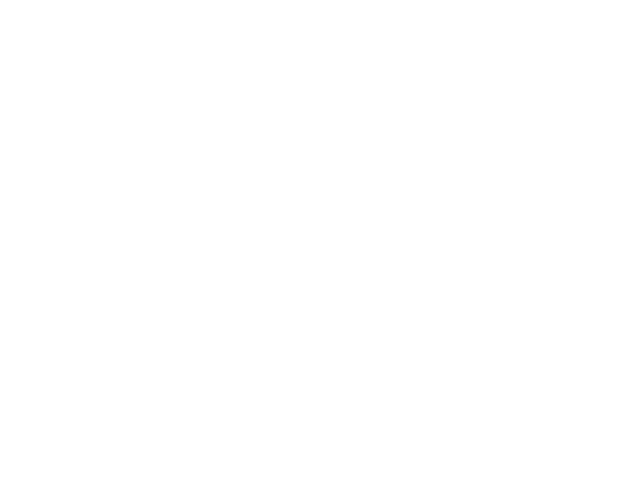

Text(0, 0.5, '$x$')

In [4]:
f, ax = plt.subplots(1)

xs = [t['tid'] for t in trials.trials]
ys = [t['misc']['vals']['x'] for t in trials.trials]

ax.set_xlim(xs[0]-10, xs[-1]+10)
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$x$ $vs$ $t$ ', fontsize=18)
ax.set_xlabel('$t$', fontsize=16)
ax.set_ylabel('$x$', fontsize=16)

We can see that initially the algorithm picks values from the whole range equally (uniformly), but as time goes on and more is learned about the parameter’s effect on the objective function, the algorithm focuses more and more on areas in which it thinks it will gain the most — the range close to zero. It still explores the whole solution space, but less frequently.

<IPython.core.display.Javascript object>


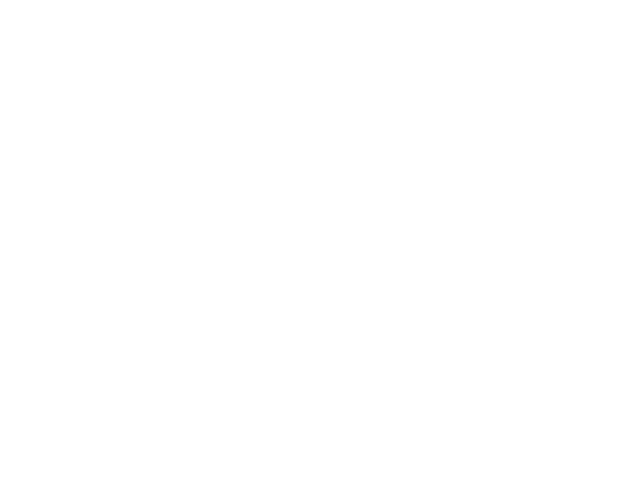

Text(0, 0.5, '$val$')

In [5]:
f, ax = plt.subplots(1)
xs = [t['misc']['vals']['x'] for t in trials.trials]
ys = [t['result']['loss'] for t in trials.trials]

ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$val$ $vs$ $x$ ', fontsize=18)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$val$', fontsize=16)

# more complicated example

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
  species   measurement  value
0  setosa  sepal_length    5.1
1  setosa  sepal_length    4.9
2  setosa  sepal_length    4.7
3  setosa  sepal_length    4.6
4  setosa  sepal_length    5.0


<IPython.core.display.Javascript object>


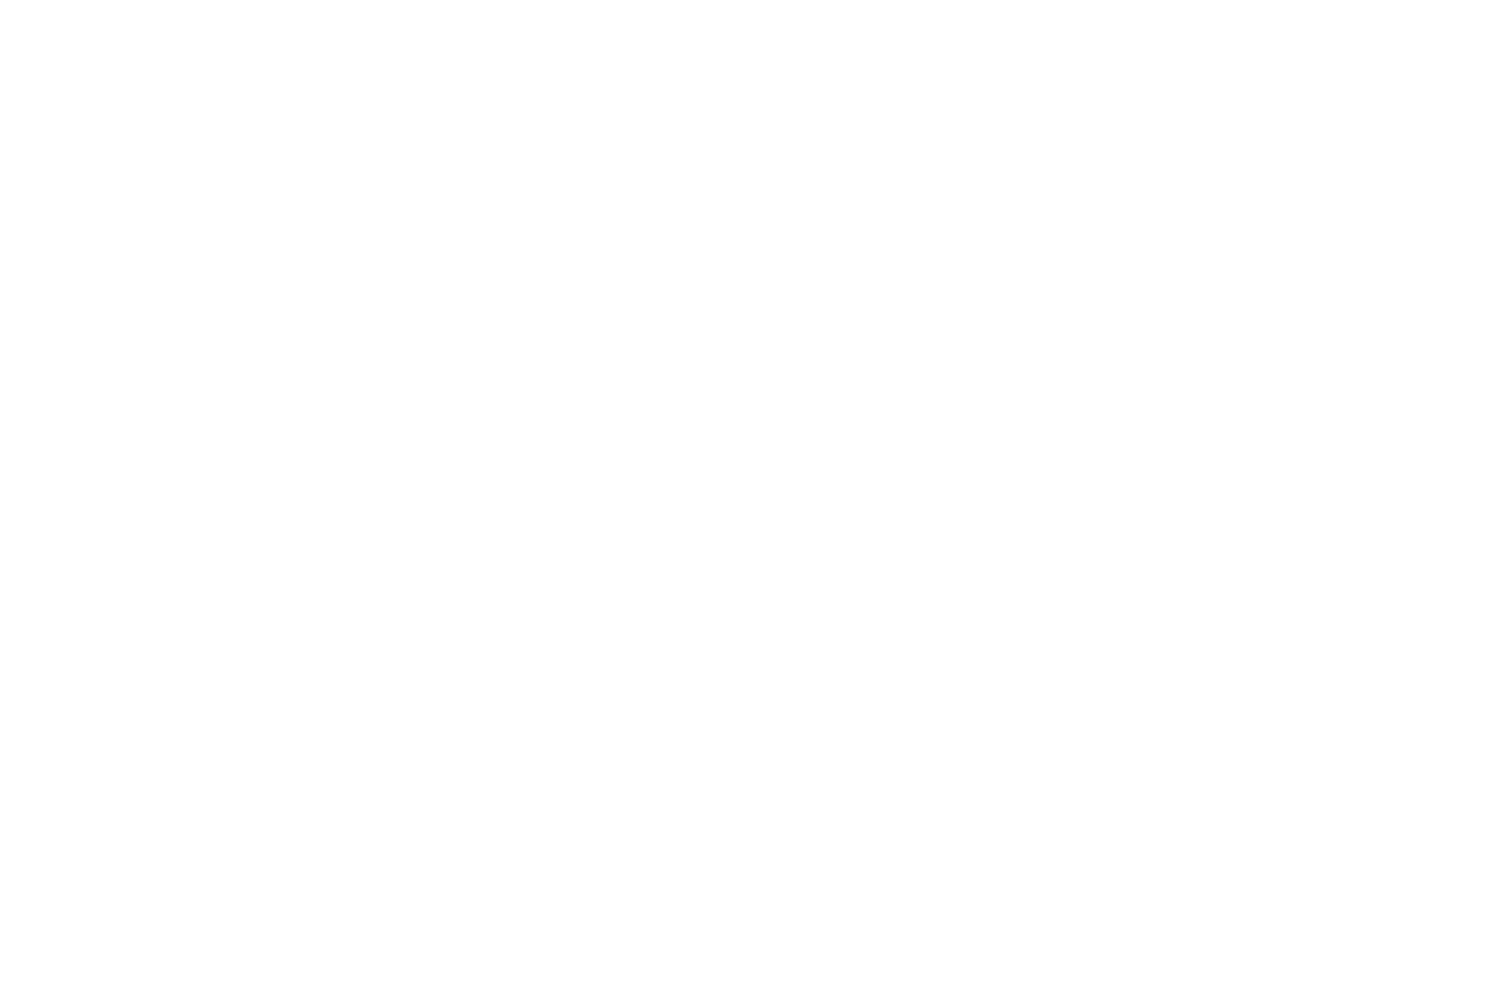

In [6]:
sns.set(style="whitegrid", palette="husl")

iris = sns.load_dataset("iris")
print (iris.head())

iris = pd.melt(iris, "species", var_name="measurement")
print (iris.head())

f, ax = plt.subplots(1, figsize=(15,10))
sns.stripplot(x="measurement", y="value", hue="species", data=iris, jitter=True, edgecolor="white", ax=ax)

# K-Nearest Neighbors

In [7]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

def hyperopt_train_test(params):
    clf = KNeighborsClassifier(**params)
    return cross_val_score(clf, X, y).mean()

space4knn = {
    'n_neighbors': hp.choice('n_neighbors', range(1,100))
}

def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, space4knn, algo=tpe.suggest, max_evals=100, trials=trials)
print ('best:')
print (best)

  0%|                                                                            | 0/100 [00:00<?, ?it/s, best loss: ?]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.w

  4%|██                                                | 4/100 [00:00<00:02, 37.01it/s, best loss: -0.9738562091503269]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.w

 12%|█████▉                                           | 12/100 [00:00<00:02, 43.26it/s, best loss: -0.9738562091503269]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.w

 20%|█████████▊                                       | 20/100 [00:00<00:01, 49.64it/s, best loss: -0.9738562091503269]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.w

 28%|█████████████▋                                   | 28/100 [00:00<00:01, 54.90it/s, best loss: -0.9738562091503269]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.w

 36%|█████████████████▋                               | 36/100 [00:00<00:01, 59.17it/s, best loss: -0.9738562091503269]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.w

 44%|█████████████████████▌                           | 44/100 [00:00<00:00, 62.27it/s, best loss: -0.9738562091503269]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.w

 52%|█████████████████████████▍                       | 52/100 [00:00<00:00, 64.97it/s, best loss: -0.9738562091503269]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.w

 60%|█████████████████████████████▍                   | 60/100 [00:00<00:00, 67.00it/s, best loss: -0.9869281045751634]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.w

 68%|█████████████████████████████████▎               | 68/100 [00:00<00:00, 68.50it/s, best loss: -0.9869281045751634]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.w

 76%|█████████████████████████████████████▏           | 76/100 [00:01<00:00, 69.58it/s, best loss: -0.9869281045751634]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.w

 83%|████████████████████████████████████████▋        | 83/100 [00:01<00:00, 63.69it/s, best loss: -0.9869281045751634]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.w

 91%|████████████████████████████████████████████▌    | 91/100 [00:01<00:00, 65.88it/s, best loss: -0.9869281045751634]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.w

 99%|████████████████████████████████████████████████▌| 99/100 [00:01<00:00, 67.50it/s, best loss: -0.9869281045751634]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



100%|████████████████████████████████████████████████| 100/100 [00:01<00:00, 67.95it/s, best loss: -0.9869281045751634]
best:
{'n_neighbors': 4}


<IPython.core.display.Javascript object>


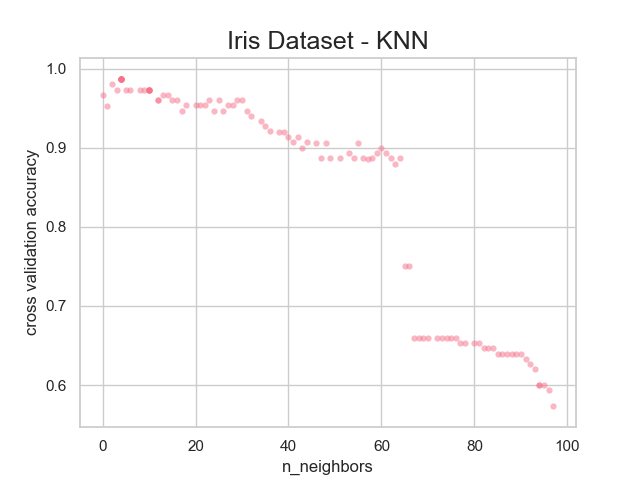

Text(0, 0.5, 'cross validation accuracy')

In [10]:
f, ax = plt.subplots(1)#, figsize=(10,10))

xs = [t['misc']['vals']['n_neighbors'] for t in trials.trials]
ys = [-t['result']['loss'] for t in trials.trials]

ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.5)
ax.set_title('Iris Dataset - KNN', fontsize=18)
ax.set_xlabel('n_neighbors', fontsize=12)
ax.set_ylabel('cross validation accuracy', fontsize=12)

# reduce n_neighbors

In [13]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

def hyperopt_train_test(params):
    clf = KNeighborsClassifier(**params)
    return cross_val_score(clf, X, y).mean()

space4knn = {
    'n_neighbors': hp.choice('n_neighbors', range(1,50))
}

def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, space4knn, algo=tpe.suggest, max_evals=100, trials=trials)

print ('best:')
print (best)

  0%|                                                                            | 0/100 [00:00<?, ?it/s, best loss: ?]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.w

  8%|████                                              | 8/100 [00:00<00:01, 77.88it/s, best loss: -0.9869281045751634]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.w

 16%|███████▊                                         | 16/100 [00:00<00:01, 77.42it/s, best loss: -0.9869281045751634]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.w

 24%|███████████▊                                     | 24/100 [00:00<00:00, 76.67it/s, best loss: -0.9869281045751634]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.w

 32%|███████████████▋                                 | 32/100 [00:00<00:00, 75.30it/s, best loss: -0.9869281045751634]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.w

 40%|███████████████████▌                             | 40/100 [00:00<00:00, 74.78it/s, best loss: -0.9869281045751634]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.w

 48%|███████████████████████▌                         | 48/100 [00:00<00:00, 74.01it/s, best loss: -0.9869281045751634]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.w

 56%|███████████████████████████▍                     | 56/100 [00:00<00:00, 74.49it/s, best loss: -0.9869281045751634]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.w

 64%|███████████████████████████████▎                 | 64/100 [00:00<00:00, 74.85it/s, best loss: -0.9869281045751634]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.w

 72%|███████████████████████████████████▎             | 72/100 [00:00<00:00, 75.30it/s, best loss: -0.9869281045751634]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.w

 80%|███████████████████████████████████████▏         | 80/100 [00:01<00:00, 75.84it/s, best loss: -0.9869281045751634]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.w

 88%|███████████████████████████████████████████      | 88/100 [00:01<00:00, 74.74it/s, best loss: -0.9869281045751634]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.w

 96%|███████████████████████████████████████████████  | 96/100 [00:01<00:00, 75.64it/s, best loss: -0.9869281045751634]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.w

100%|████████████████████████████████████████████████| 100/100 [00:01<00:00, 75.10it/s, best loss: -0.9869281045751634]
best:
{'n_neighbors': 4}


<IPython.core.display.Javascript object>


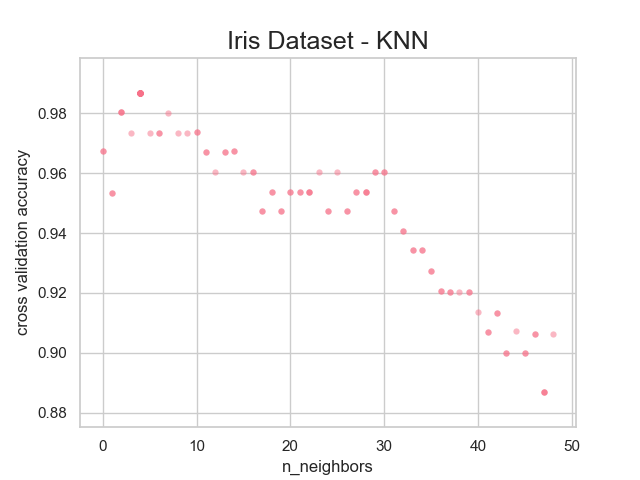

Text(0, 0.5, 'cross validation accuracy')

In [14]:
f, ax = plt.subplots(1)#, figsize=(10,10))

xs = [t['misc']['vals']['n_neighbors'] for t in trials.trials]
ys = [-t['result']['loss'] for t in trials.trials]

ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.5)
ax.set_title('Iris Dataset - KNN', fontsize=18)
ax.set_xlabel('n_neighbors', fontsize=12)
ax.set_ylabel('cross validation accuracy', fontsize=12)

# preprocessing

In [34]:
# now with scaling as an option
iris = datasets.load_iris()
X = iris.data
y = iris.target

def hyperopt_train_test(params):
    X_ = X[:]    
    
    if 'normalize' in params:
        if params['normalize'] == 1:
            X_ = nor(X_)
            del params['normalize']    
            
    if 'scale' in params:
        if params['scale'] == 1:
            X_ = sc(X_)
            del params['scale']    
            
    clf = KNeighborsClassifier(**params)
    return cross_val_score(clf, X_, y).mean()

space4knn = {
    'n_neighbors': hp.choice('n_neighbors', range(1,50)),
    'scale': hp.choice('scale', [0, 1]),
    'normalize': hp.choice('normalize', [0, 1])
}

def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, space4knn, algo=tpe.suggest, max_evals=100, trials=trials)
print ('best:')
print (best)

  0%|                                                                            | 0/100 [00:00<?, ?it/s, best loss: ?]


TypeError: __init__() got an unexpected keyword argument 'normalize'

In [37]:
parameters = ['n_neighbors', 'scale', 'normalize']

cols = len(parameters)

f, axes = plt.subplots(nrows=1, ncols=cols, figsize=(15,5))
cmap = plt.cm.jet

for i, val in enumerate(parameters):
    xs = np.array([t['misc']['vals'][val] for t in 
trials.trials]).ravel()
    ys = [-t['result']['loss'] for t in trials.trials]
    xs, ys = zip(\*sorted(zip(xs, ys)))
    ys = np.array(ys)
    axes[i].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75, c=cmap(float(i)/len(parameters)))
    axes[i].set_title(val)

SyntaxError: unexpected character after line continuation character (<ipython-input-37-03aea448e9f8>, line 12)

In [46]:
X = iris.data
y = iris.target

def hyperopt_train_test(params):
    X_ = X[:]    

    if 'normalize' in params:
        if params['normalize'] == 1:
            X_ = normalize(X_)
            del params['normalize']    
            
    if 'scale' in params:
        if params['scale'] == 1:
            X_ = scale(X_)
            del params['scale']    

    clf = SVC(**params)
    return cross_val_score(clf, X_, y).mean()

space4svm = {
    'C': hp.uniform('C', 0, 20),
    'kernel': hp.choice('kernel', ['linear', 'sigmoid', 'poly', 'rbf']),
    'gamma': hp.uniform('gamma', 0, 20),
    'scale': hp.choice('scale', [0, 1]),
    'normalize': hp.choice('normalize', [0, 1])
}

def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()

best = fmin(f, space4svm, algo=tpe.suggest, max_evals=100, trials=trials)
print ('best:')
print (best)

parameters = ['C', 'kernel', 'gamma', 'scale', 'normalize']
cols = len(parameters)

f, axes = plt.subplots(nrows=1, ncols=cols, figsize=(20,5))

cmap = plt.cm.jet

for i, val in enumerate(parameters):
    xs = np.array([t['misc']['vals'][val] for t in trials.trials]).ravel()
    ys = [-t['result']['loss'] for t in trials.trials]
#     xs, ys = zip(\*sorted(zip(xs, ys)))
    
axes[i].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.25, c=cmap(float(i)/len(parameters)))
axes[i].set_title(val)
axes[i].set_ylim([0.9, 1.0])

  0%|                                                                            | 0/100 [00:00<?, ?it/s, best loss: ?]


NameError: name 'SVC' is not defined

In [53]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
print (X.shape, y.shape)

def hyperopt_train_test(params):
    t = params['type']
    del params['type']
    if t == 'naive_bayes':
        clf = BernoulliNB(**params)
    elif t == 'svm':
        clf = SVC(**params)
    elif t == 'dtree':
        clf = DecisionTreeClassifier(**params)
    elif t == 'knn':
        clf = KNeighborsClassifier(**params)
    else:
        return 0
    return cross_val_score(clf, X, y).mean()

space = hp.choice('classifier_type', [
    {
        'type': 'naive_bayes',
        'alpha': hp.uniform('alpha', 0.0, 2.0)
    },
    {
        'type': 'svm',
        'C': hp.uniform('C', 0, 10.0),
        'kernel': hp.choice('kernel', ['linear', 'rbf']),
        'gamma': hp.uniform('gamma', 0, 20.0)
    },
    {
        'type': 'randomforest',
        'max_depth': hp.choice('max_depth', range(1,20)),
        'max_features': hp.choice('max_features', range(1,5)),
        'n_estimators': hp.choice('n_estimators', range(1,20)),
        'criterion': hp.choice('criterion', ["gini", "entropy"]),
        'scale': hp.choice('scale', [0, 1]),
        'normalize': hp.choice('normalize', [0, 1])
    },
    {
        'type': 'knn',
        'n_neighbors': hp.choice('knn_n_neighbors', range(1,50))
    }  
])

count = 0
best = 0

def f(params):
    global best, count
    count += 1
    acc = hyperopt_train_test(params.copy())
    if acc > best:
        print ('new best:', acc, 'using', params['type'])
        best = acc
    if count % 50 == 0:
        print ('iters:', count, ', acc:', acc, 'using', params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, space, algo=tpe.suggest, max_evals=1500, trials=trials, verbose=False)
print ('best:')
print(best)

(1797, 64) (1797,)
  0%|                                                                           | 0/1500 [00:00<?, ?it/s, best loss: ?]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                                                              
0.9376812991712885                                                                                                     
using                                                                                                                  
knn                                                                                                                    
  0%|                                                 | 1/1500 [00:00<07:37,  3.28it/s, best loss: -0.9376812991712885]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  0%|                                                 | 3/1500 [00:00<06:30,  3.83it/s, best loss: -0.9376812991712885]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                                                              
0.9627317178438357                                                                                                     
using                                                                                                                  
knn                                                                                                                    
  0%|▏                                                | 7/1500 [00:01<05:17,  4.70it/s, best loss: -0.9627317178438357]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  1%|▎                                                | 9/1500 [00:01<04:52,  5.10it/s, best loss: -0.9627317178438357]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  1%|▍                                               | 12/1500 [00:01<04:14,  5.84it/s, best loss: -0.9627317178438357]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  1%|▍                                               | 15/1500 [00:01<03:19,  7.43it/s, best loss: -0.9627317178438357]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  1%|▌                                               | 17/1500 [00:02<03:26,  7.18it/s, best loss: -0.9627317178438357]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  1%|▌                                               | 18/1500 [00:02<03:26,  7.19it/s, best loss: -0.9627317178438357]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  1%|▌                                               | 19/1500 [00:02<04:34,  5.39it/s, best loss: -0.9627317178438357]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  1%|▋                                               | 20/1500 [00:03<12:55,  1.91it/s, best loss: -0.9627317178438357]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  1%|▋                                               | 21/1500 [00:04<11:28,  2.15it/s, best loss: -0.9627317178438357]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  1%|▋                                               | 22/1500 [00:04<10:22,  2.37it/s, best loss: -0.9627317178438357]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  2%|▋                                               | 23/1500 [00:04<09:20,  2.63it/s, best loss: -0.9627317178438357]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  2%|▊                                               | 24/1500 [00:05<08:46,  2.80it/s, best loss: -0.9627317178438357]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  2%|▊                                               | 25/1500 [00:05<08:26,  2.91it/s, best loss: -0.9627317178438357]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  2%|▊                                               | 26/1500 [00:05<08:09,  3.01it/s, best loss: -0.9627317178438357]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  2%|▊                                               | 27/1500 [00:07<15:15,  1.61it/s, best loss: -0.9627317178438357]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                                                              
0.9638418828093077                                                                                                     
using                                                                                                                  
knn                                                                                                                    
  2%|▉                                               | 28/1500 [00:07<12:47,  1.92it/s, best loss: -0.9638418828093077]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  2%|▉                                               | 29/1500 [00:07<10:53,  2.25it/s, best loss: -0.9638418828093077]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  2%|▉                                               | 30/1500 [00:07<09:34,  2.56it/s, best loss: -0.9638418828093077]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  2%|▉                                               | 31/1500 [00:08<08:36,  2.84it/s, best loss: -0.9638418828093077]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  2%|█                                               | 32/1500 [00:08<08:00,  3.06it/s, best loss: -0.9638418828093077]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  2%|█                                               | 34/1500 [00:08<06:12,  3.93it/s, best loss: -0.9638418828093077]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  2%|█                                               | 35/1500 [00:08<06:32,  3.73it/s, best loss: -0.9638418828093077]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  2%|█▏                                              | 37/1500 [00:09<05:49,  4.19it/s, best loss: -0.9638418828093077]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  3%|█▎                                              | 40/1500 [00:09<04:50,  5.03it/s, best loss: -0.9638418828093077]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  3%|█▎                                              | 41/1500 [00:09<05:28,  4.44it/s, best loss: -0.9638418828093077]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  3%|█▍                                              | 44/1500 [00:11<07:13,  3.36it/s, best loss: -0.9638418828093077]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  3%|█▍                                              | 45/1500 [00:11<07:11,  3.37it/s, best loss: -0.9638418828093077]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  3%|█▍                                              | 46/1500 [00:11<07:20,  3.30it/s, best loss: -0.9638418828093077]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  3%|█▌                                              | 49/1500 [00:12<06:02,  4.00it/s, best loss: -0.9638418828093077]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



iters:                                                                                                                 
50                                                                                                                     
, acc:                                                                                                                 
0.1029566652103485                                                                                                     
using                                                                                                                  
{'C': 4.846501096914767, 'gamma': 0.34859617381170693, 'kernel': 'rbf', 'type': 'svm'}                                 
  3%|█▌                                              | 50/1500 [00:13<13:22,  1.81it/s, best loss: -0.9638418828093077]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  3%|█▋                                              | 51/1500 [00:13<11:28,  2.10it/s, best loss: -0.9638418828093077]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  4%|█▋                                              | 53/1500 [00:14<09:06,  2.65it/s, best loss: -0.9638418828093077]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  4%|█▋                                              | 54/1500 [00:14<08:34,  2.81it/s, best loss: -0.9638418828093077]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  4%|█▊                                              | 55/1500 [00:14<07:01,  3.43it/s, best loss: -0.9638418828093077]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  4%|█▊                                              | 56/1500 [00:14<06:59,  3.44it/s, best loss: -0.9638418828093077]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  4%|█▉                                              | 59/1500 [00:15<05:40,  4.23it/s, best loss: -0.9638418828093077]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  4%|█▉                                              | 60/1500 [00:15<06:09,  3.90it/s, best loss: -0.9638418828093077]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  4%|█▉                                              | 61/1500 [00:15<05:15,  4.57it/s, best loss: -0.9638418828093077]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  4%|█▉                                              | 62/1500 [00:15<05:54,  4.06it/s, best loss: -0.9638418828093077]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  4%|██                                              | 64/1500 [00:16<05:18,  4.51it/s, best loss: -0.9638418828093077]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  4%|██                                              | 66/1500 [00:16<04:55,  4.85it/s, best loss: -0.9638418828093077]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  4%|██▏                                             | 67/1500 [00:16<05:39,  4.22it/s, best loss: -0.9638418828093077]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                                                              
0.9644039680147021                                                                                                     
using                                                                                                                  
knn                                                                                                                    
  5%|██▏                                             | 68/1500 [00:17<06:04,  3.93it/s, best loss: -0.9644039680147021]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  5%|██▏                                             | 69/1500 [00:17<06:37,  3.60it/s, best loss: -0.9644039680147021]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  5%|██▏                                             | 70/1500 [00:17<06:41,  3.56it/s, best loss: -0.9644039680147021]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  5%|██▎                                             | 71/1500 [00:18<06:50,  3.49it/s, best loss: -0.9644039680147021]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  5%|██▎                                             | 72/1500 [00:18<06:55,  3.43it/s, best loss: -0.9644039680147021]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  5%|██▎                                             | 73/1500 [00:18<07:03,  3.37it/s, best loss: -0.9644039680147021]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  5%|██▎                                             | 74/1500 [00:18<07:04,  3.36it/s, best loss: -0.9644039680147021]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  5%|██▍                                             | 75/1500 [00:19<07:15,  3.27it/s, best loss: -0.9644039680147021]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  5%|██▍                                             | 76/1500 [00:20<15:01,  1.58it/s, best loss: -0.9644039680147021]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  5%|██▍                                             | 77/1500 [00:20<12:47,  1.86it/s, best loss: -0.9644039680147021]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  5%|██▍                                             | 78/1500 [00:21<11:23,  2.08it/s, best loss: -0.9644039680147021]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  5%|██▌                                             | 80/1500 [00:21<09:10,  2.58it/s, best loss: -0.9644039680147021]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  5%|██▌                                             | 82/1500 [00:21<07:29,  3.16it/s, best loss: -0.9644039680147021]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  6%|██▋                                             | 83/1500 [00:22<06:15,  3.77it/s, best loss: -0.9644039680147021]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  6%|██▋                                             | 84/1500 [00:22<06:36,  3.57it/s, best loss: -0.9644039680147021]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  6%|██▊                                             | 86/1500 [00:22<05:54,  3.99it/s, best loss: -0.9644039680147021]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  6%|██▊                                             | 88/1500 [00:23<05:11,  4.53it/s, best loss: -0.9644039680147021]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  6%|██▊                                             | 89/1500 [00:23<05:49,  4.03it/s, best loss: -0.9644039680147021]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  6%|██▉                                             | 90/1500 [00:24<13:13,  1.78it/s, best loss: -0.9644039680147021]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  6%|██▉                                             | 91/1500 [00:25<11:23,  2.06it/s, best loss: -0.9644039680147021]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  6%|██▉                                             | 93/1500 [00:25<09:10,  2.56it/s, best loss: -0.9644039680147021]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  6%|███                                             | 95/1500 [00:25<07:30,  3.12it/s, best loss: -0.9644039680147021]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  6%|███                                             | 96/1500 [00:27<14:42,  1.59it/s, best loss: -0.9644039680147021]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  6%|███                                             | 97/1500 [00:27<12:25,  1.88it/s, best loss: -0.9644039680147021]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  7%|███▏                                            | 99/1500 [00:27<09:51,  2.37it/s, best loss: -0.9644039680147021]

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                                                              
0.968293886616605                                                                                                      
using                                                                                                                  
knn                                                                                                                    
iters:                                                                                                                 
100                                                                                                                    
, acc:                                                                                                                 
0.968293886616605                                                                                                      
using                                   

e:\programs\python\envs\work\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



  7%|███▏                                            | 101/1500 [00:28<06:28,  3.60it/s, best loss: -0.968293886616605]


KeyboardInterrupt: 